<a href="https://colab.research.google.com/github/SethupathyM/Supervised_ML-Appliances_Energy_Prediction-Capstone_Project/blob/main/Appliances_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 29)

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [60]:
# Reading the data file
df = pd.read_csv('/content/drive/MyDrive/Capstone_Project_ML_Supervised_Appliance_Energy/Copy of data_application_energy.csv')

In [61]:
# shape
df.shape

(19735, 29)

In [62]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [63]:
# Columns
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [64]:
len(df.columns)

29

In [65]:
# Renaming the columns
df.rename(columns = {'date':'Date','T1':'Temp_in_kitchen','RH_1':'Hum_in_kitchen','T2':'Temp_in_living_room','RH_2':'Hum_in_living_room',
           'T3':'Temp_in_laundry_room','RH_3':'Hum_in_laundry_room','T4':'Temp_in_office','RH_4':'Humidity_in_office','T5':'Temp_in_bathroom','RH_5':'Hum_in_bathroom',
           'T6':'Temp_outside_the_building','RH_6':'Hum_outside_the_building','T7':'Temp_in_ironing_room','RH_7':'Humidity_in_ironing_room','T8':'Temp_in_teenager_room','RH_8':'Hum_in_teenager_room',
           'T9':'Temp_in_parents_room','RH_9':'Hum_in_parents_room','T_out':'Temp_outside','Press_mm_hg':'Pressure','RH_out':'Humidity_outside'},inplace = True)

In [66]:
df.columns

Index(['Date', 'Appliances', 'lights', 'Temp_in_kitchen', 'Hum_in_kitchen',
       'Temp_in_living_room', 'Hum_in_living_room', 'Temp_in_laundry_room',
       'Hum_in_laundry_room', 'Temp_in_office', 'Humidity_in_office',
       'Temp_in_bathroom', 'Hum_in_bathroom', 'Temp_outside_the_building',
       'Hum_outside_the_building', 'Temp_in_ironing_room',
       'Humidity_in_ironing_room', 'Temp_in_teenager_room',
       'Hum_in_teenager_room', 'Temp_in_parents_room', 'Hum_in_parents_room',
       'Temp_outside', 'Pressure', 'Humidity_outside', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [10]:
len(df.columns)

29

In [11]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       19735 non-null  object 
 1   Appliances                 19735 non-null  int64  
 2   lights                     19735 non-null  int64  
 3   Temp_in_kitchen            19735 non-null  float64
 4   Hum_in_kitchen             19735 non-null  float64
 5   Temp_in_living_room        19735 non-null  float64
 6   Hum_in_living_room         19735 non-null  float64
 7   Temp_in_laundry_room       19735 non-null  float64
 8   Hum_in_laundry_room        19735 non-null  float64
 9   Temp_in_office             19735 non-null  float64
 10  Humidity_in_office         19735 non-null  float64
 11  Temp_in_bathroom           19735 non-null  float64
 12  Hum_in_bathroom            19735 non-null  float64
 13  Temp_outside_the_building  19735 non-null  flo

In [12]:
# Sum of Null values
df.isnull().sum()

Date                         0
Appliances                   0
lights                       0
Temp_in_kitchen              0
Hum_in_kitchen               0
Temp_in_living_room          0
Hum_in_living_room           0
Temp_in_laundry_room         0
Hum_in_laundry_room          0
Temp_in_office               0
Humidity_in_office           0
Temp_in_bathroom             0
Hum_in_bathroom              0
Temp_outside_the_building    0
Hum_outside_the_building     0
Temp_in_ironing_room         0
Humidity_in_ironing_room     0
Temp_in_teenager_room        0
Hum_in_teenager_room         0
Temp_in_parents_room         0
Hum_in_parents_room          0
Temp_outside                 0
Pressure                     0
Humidity_outside             0
Windspeed                    0
Visibility                   0
Tdewpoint                    0
rv1                          0
rv2                          0
dtype: int64

In [13]:
# Summary
df.describe([0.90,0.95,0.98,0.99])

,Appliances,lights,Temp_in_kitchen,Hum_in_kitchen,Temp_in_living_room,Hum_in_living_room,Temp_in_laundry_room,Hum_in_laundry_room,Temp_in_office,Humidity_in_office,Temp_in_bathroom,Hum_in_bathroom,Temp_outside_the_building,Hum_outside_the_building,Temp_in_ironing_room,Humidity_in_ironing_room,Temp_in_teenager_room,Hum_in_teenager_room,Temp_in_parents_room,Hum_in_parents_room,Temp_outside,Pressure,Humidity_outside,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
90%,196.000000,20.000000,23.963333,45.700000,23.331200,45.227333,25.100000,44.363333,23.790000,45.500000,22.480200,60.875333,16.058000,94.466667,23.390000,42.590000,24.456000,50.374000,22.700000,47.736000,14.550000,764.833333,95.666667,7.666667,59.266667,9.200000,45.155695,45.155695
95%,330.000000,20.000000,24.726455,47.326667,24.557667,46.664333,26.200000,45.090000,24.500000,46.790000,23.390000,70.390000,19.551200,98.590000,24.081000,44.200000,25.100000,52.066917,23.200000,49.046929,17.100000,766.600000,97.000000,9.000000,62.666667,11.233333,47.533568,47.533568
98%,450.000000,30.000000,25.200000,48.760000,26.100000,48.700000,26.700000,45.832956,25.290000,48.302659,24.000000,81.072933,23.701845,99.900000,24.700000,45.437361,25.890000,54.045000,24.000000,50.200000,20.872000,768.566667,98.833333,10.000000,64.000000,13.450000,48.997006,48.997006
99%,576.600000,30.000000,25.500000,50.492200,26.952857,49.790000,27.133333,46.500000,25.600000,49.200000,24.100000,85.589367,25.147270,99.900000,24.890000,46.398752,26.225920,54.860889,24.100000,50.995259,22.500000,769.700000,99.000000,10.943333,64.666667,14.050000,49.462361,49.462361
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


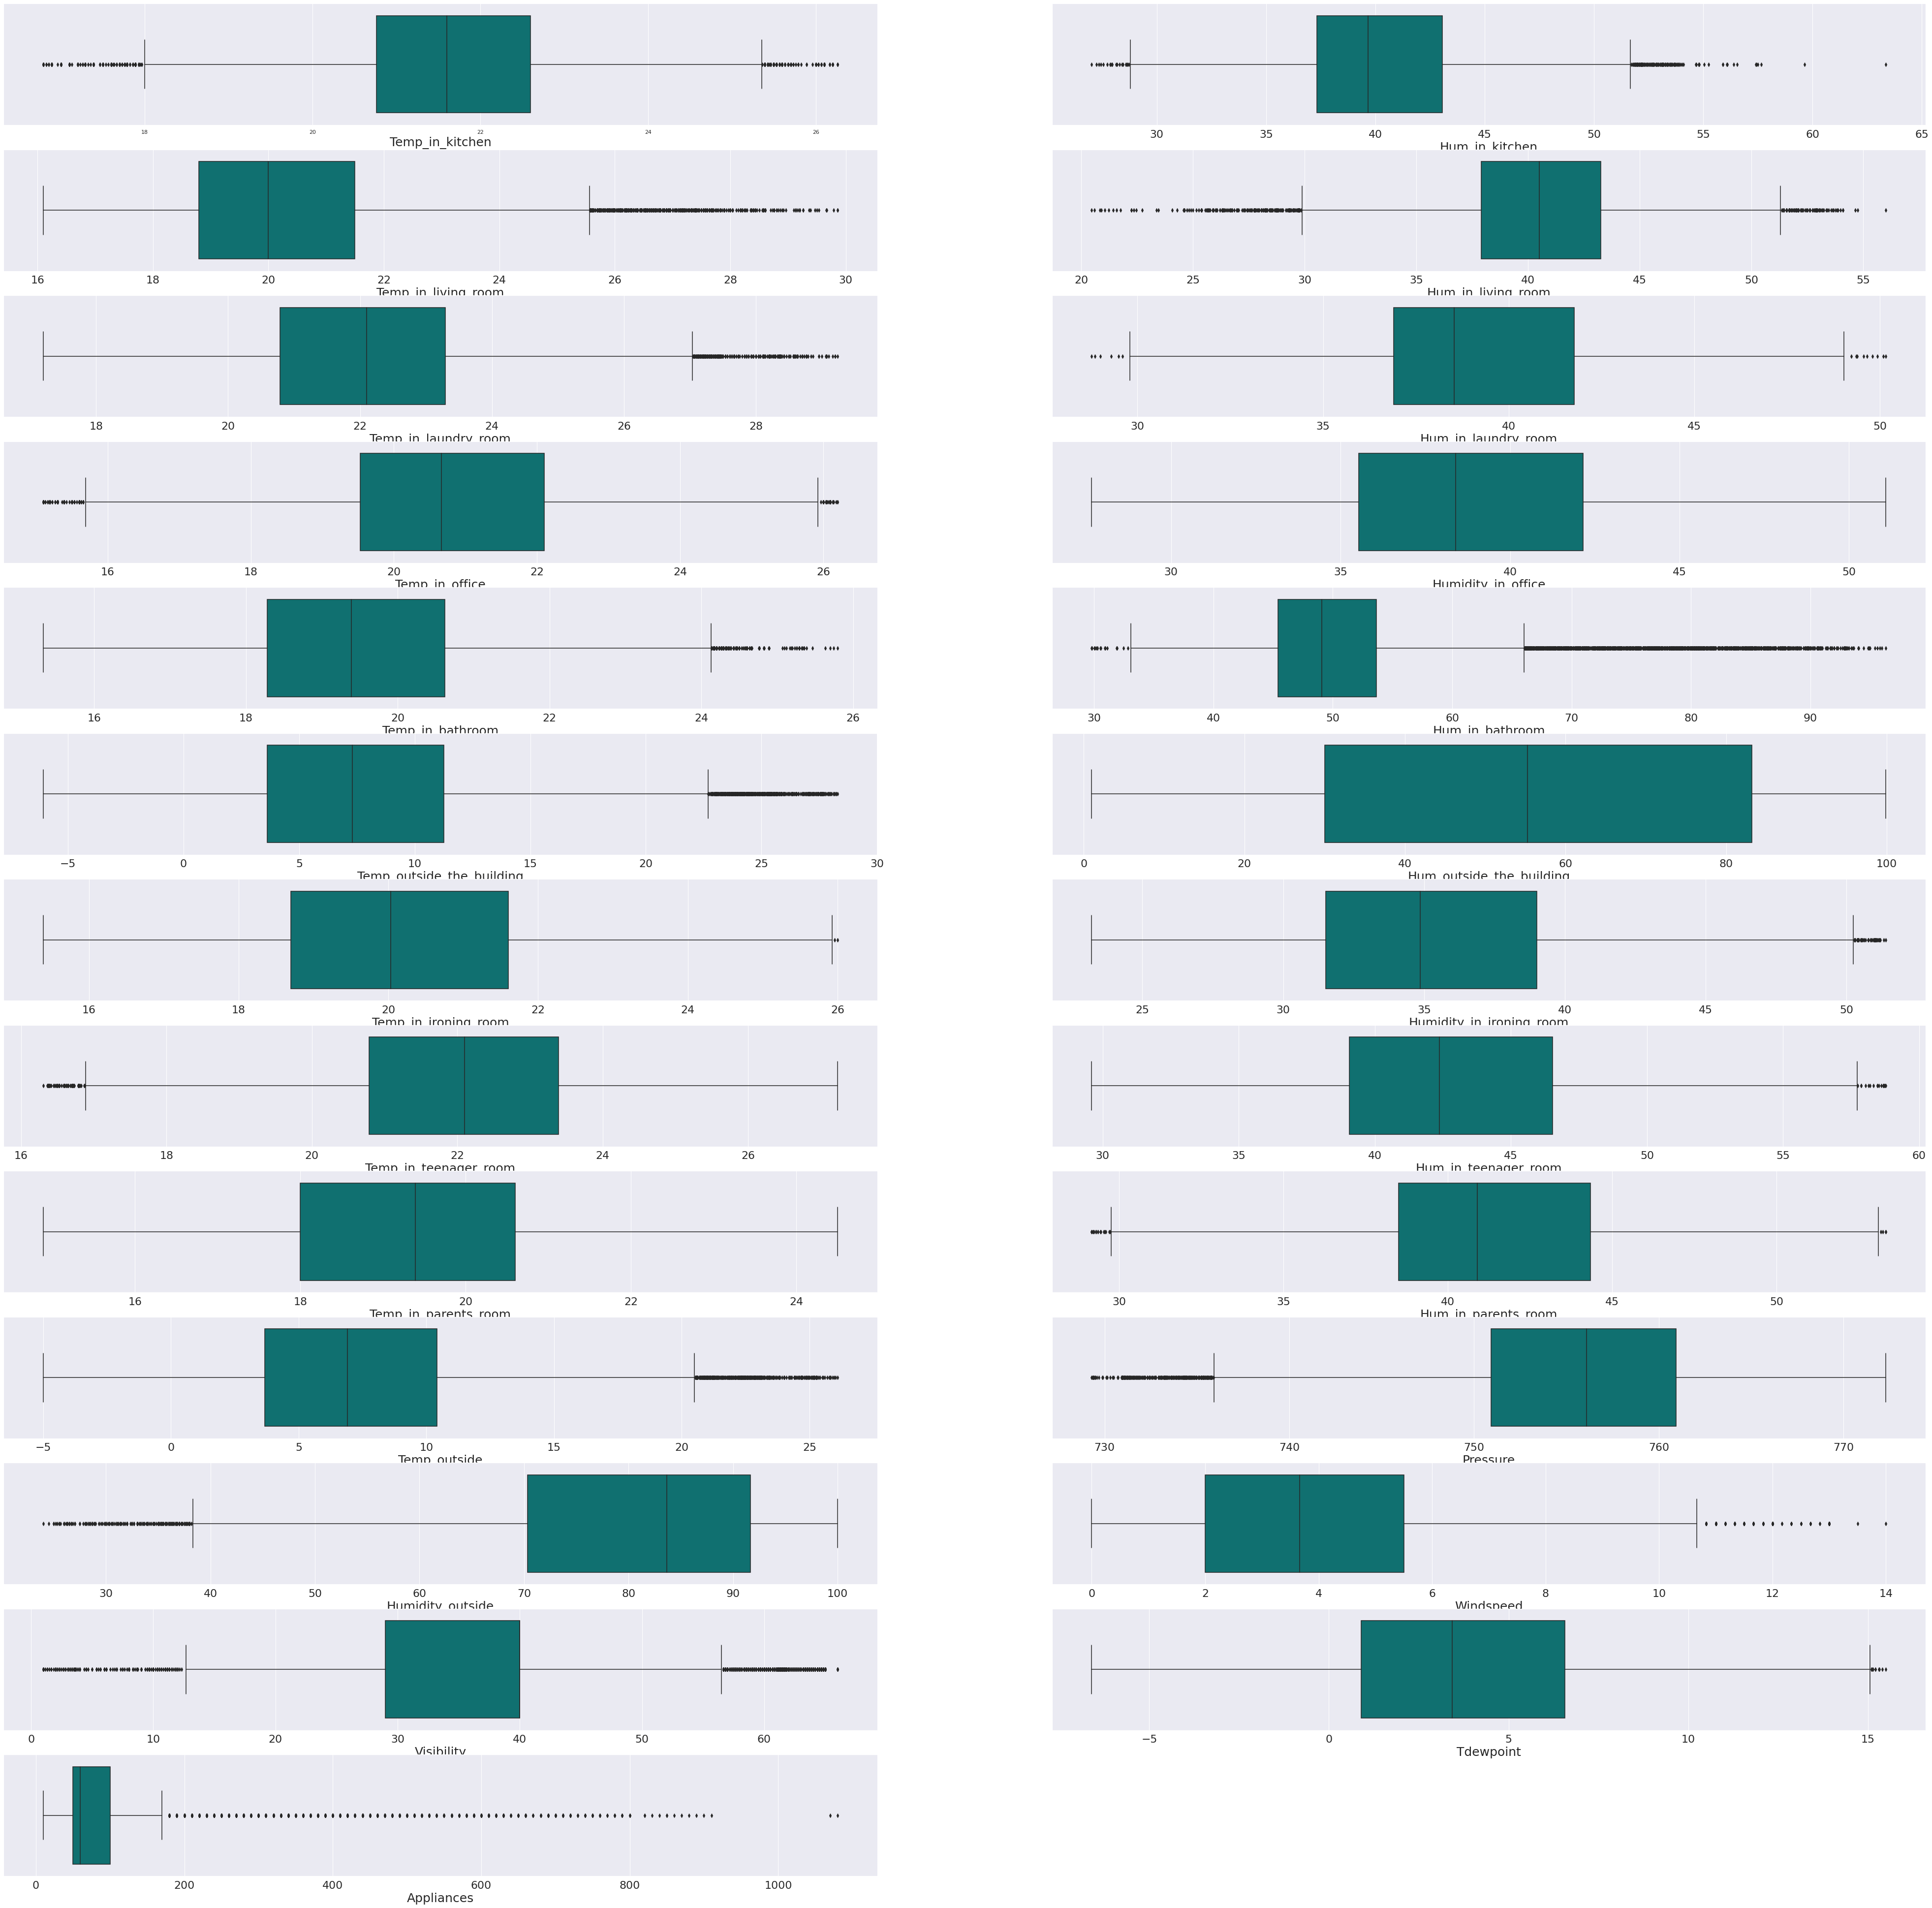

In [14]:
# Box plot to detect the outliers
lst_box = ['Temp_in_kitchen', 'Hum_in_kitchen','Temp_in_living_room', 'Hum_in_living_room', 'Temp_in_laundry_room',
       'Hum_in_laundry_room', 'Temp_in_office', 'Humidity_in_office',
       'Temp_in_bathroom', 'Hum_in_bathroom', 'Temp_outside_the_building',
       'Hum_outside_the_building', 'Temp_in_ironing_room',
       'Humidity_in_ironing_room', 'Temp_in_teenager_room',
       'Hum_in_teenager_room', 'Temp_in_parents_room', 'Hum_in_parents_room',
       'Temp_outside', 'Pressure', 'Humidity_outside', 'Windspeed',
       'Visibility', 'Tdewpoint','Appliances']
plt.figure(figsize = (70,70))
sns.set_theme()
for i in enumerate(lst_box):
    plt.subplot(13, 2,i[0]+1)
    sns.set(font_scale = 2)
    sns.boxplot(df[i[1]],color='teal')
    plt.xlabel(i[1],fontsize=25)

In [15]:
# Outliers
# Outliers treatment by replacing the outliers with median
lst_outliers = ['Temp_in_kitchen', 'Hum_in_kitchen','Temp_in_living_room', 'Hum_in_living_room', 'Temp_in_laundry_room',
       'Hum_in_laundry_room', 'Temp_in_office', 'Humidity_in_office',
       'Temp_in_bathroom', 'Hum_in_bathroom', 'Temp_outside_the_building',
       'Hum_outside_the_building', 'Temp_in_ironing_room',
       'Humidity_in_ironing_room', 'Temp_in_teenager_room',
       'Hum_in_teenager_room', 'Temp_in_parents_room', 'Hum_in_parents_room',
       'Temp_outside', 'Pressure', 'Humidity_outside', 'Windspeed',
       'Visibility', 'Tdewpoint','Appliances']
for i in lst_outliers:
  quantile1,quantile3 = np.percentile(df[i],[25,75])
  # print('Quantile1:',quantile1)
  # print('Quantile3:',quantile3)
  iqr = quantile3 - quantile1
  # print('IQR:',iqr)
  lower_bound_val = quantile1 - (1.5 * iqr)
  upper_bound_val = quantile3 + (1.5 * iqr)
  # print(i+'_Lower Bound:',lower_bound_val)
  print(i+'_Upper Bound:',upper_bound_val)
  df[i] = df[i].apply(lambda x: df[i].median() if x > upper_bound_val else x)

Temp_in_kitchen_Upper Bound: 25.36
Hum_in_kitchen_Upper Bound: 51.666666666666806
Temp_in_living_room_Upper Bound: 25.565
Hum_in_living_room_Upper Bound: 51.3
Temp_in_laundry_room_Upper Bound: 27.04
Hum_in_laundry_room_Upper Bound: 49.05
Temp_in_office_Upper Bound: 25.955000000000002
Humidity_in_office_Upper Bound: 52.09666666666675
Temp_in_bathroom_Upper Bound: 24.132857142857127
Hum_in_bathroom_Upper Bound: 66.05833333333325
Temp_outside_the_building_Upper Bound: 22.699999999999996
Hum_outside_the_building_Upper Bound: 163.02916666666675
Temp_in_ironing_room_Upper Bound: 25.950000000000003
Humidity_in_ironing_room_Upper Bound: 50.25
Temp_in_teenager_room_Upper Bound: 27.290000000000003
Hum_in_teenager_room_Upper Bound: 57.73999999999995
Temp_in_parents_room_Upper Bound: 24.500000000000004
Hum_in_parents_room_Upper Bound: 53.09523809523798
Temp_outside_Upper Bound: 20.520833333333368
Pressure_Upper Bound: 775.9333333333329
Humidity_outside_Upper Bound: 123.6666666666668
Windspeed_Uppe

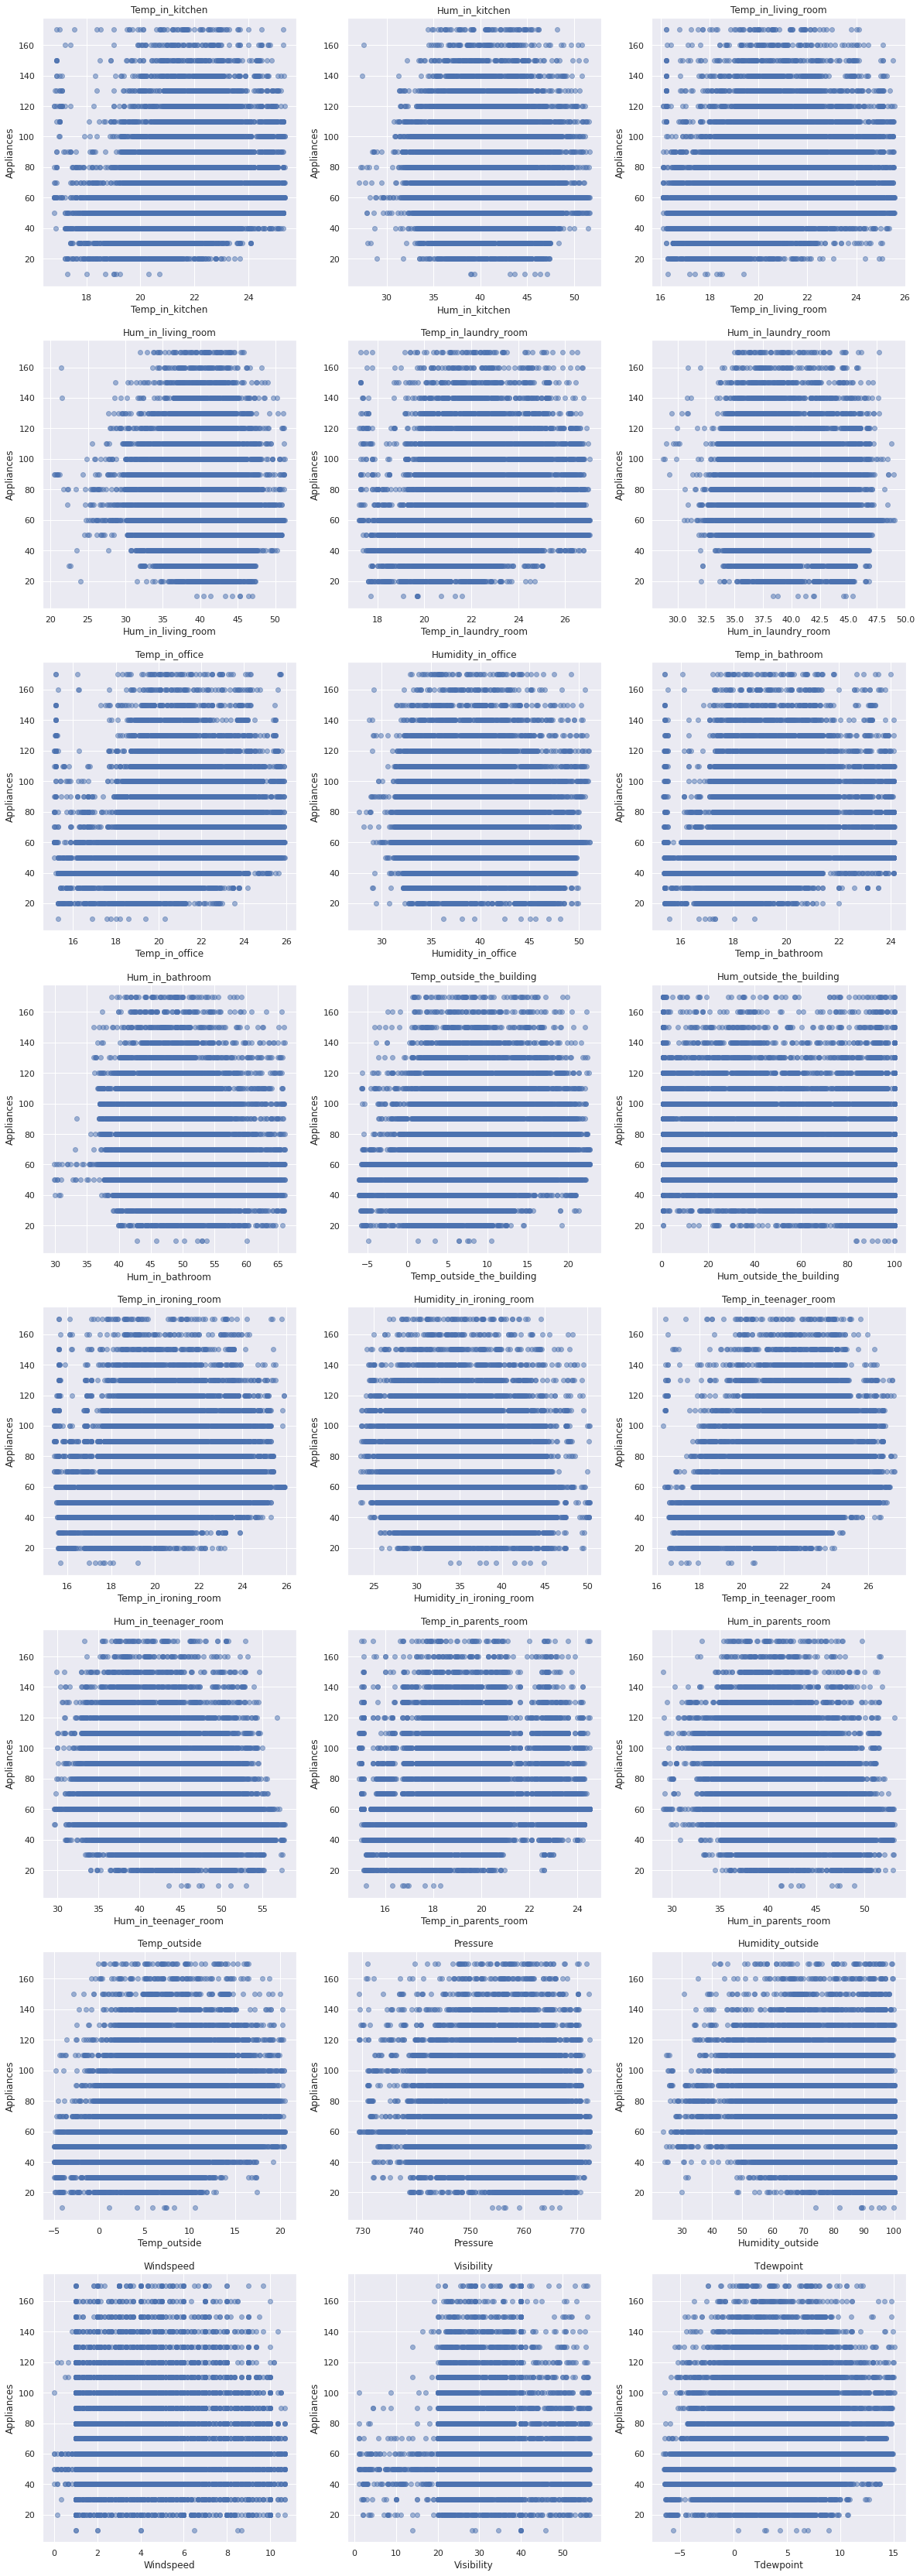

In [16]:
# Scatter plot
lst_scatter = ['Temp_in_kitchen', 'Hum_in_kitchen','Temp_in_living_room', 'Hum_in_living_room', 'Temp_in_laundry_room',
       'Hum_in_laundry_room', 'Temp_in_office', 'Humidity_in_office',
       'Temp_in_bathroom', 'Hum_in_bathroom', 'Temp_outside_the_building',
       'Hum_outside_the_building', 'Temp_in_ironing_room',
       'Humidity_in_ironing_room', 'Temp_in_teenager_room',
       'Hum_in_teenager_room', 'Temp_in_parents_room', 'Hum_in_parents_room',
       'Temp_outside', 'Pressure', 'Humidity_outside', 'Windspeed',
       'Visibility', 'Tdewpoint']
# lst_count = ['Temp_in_kitchen', 'Hum_in_kitchen']
plt.figure(figsize = (20,60))
sns.set_theme()
for i in enumerate(lst_scatter):
    plt.subplot(8, 3,i[0]+1)
    plt.scatter(df[i[1]], df['Appliances'], alpha=0.5)
    plt.title(i[1])
    plt.xlabel(i[1])
    plt.ylabel('Appliances')


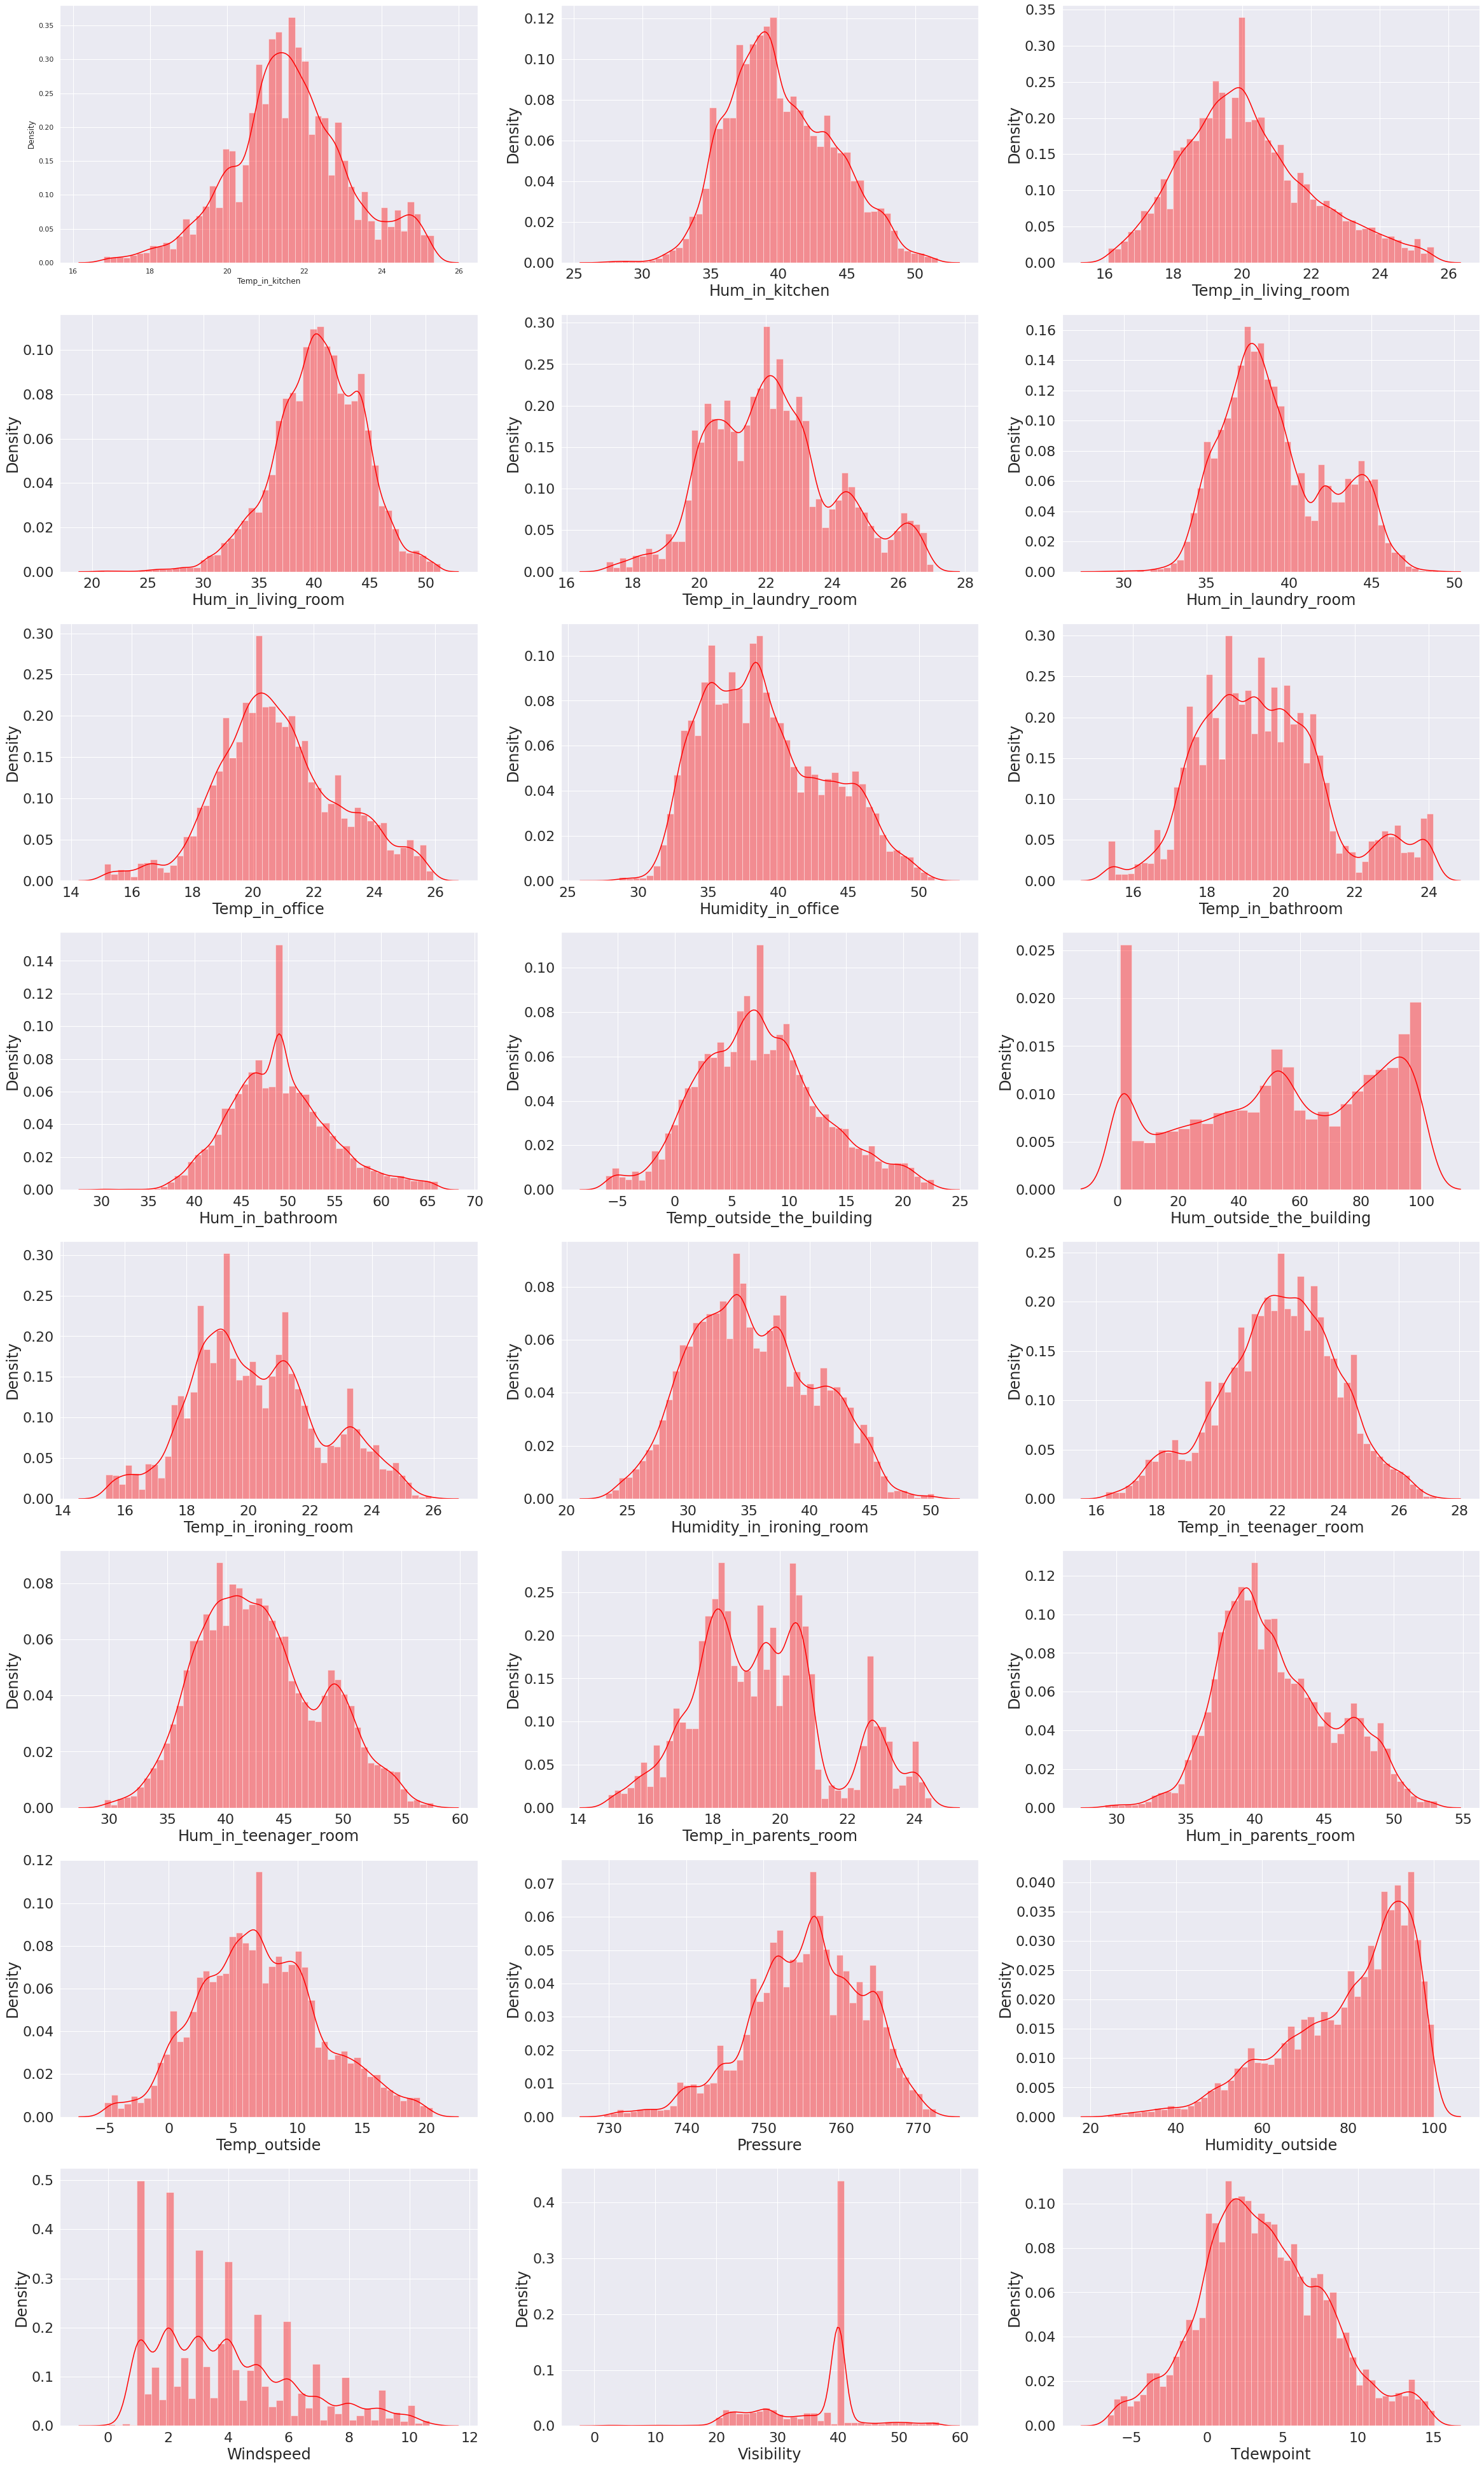

In [17]:
# Distribution plot
lst_dist = ['Temp_in_kitchen', 'Hum_in_kitchen','Temp_in_living_room', 'Hum_in_living_room', 'Temp_in_laundry_room',
       'Hum_in_laundry_room', 'Temp_in_office', 'Humidity_in_office',
       'Temp_in_bathroom', 'Hum_in_bathroom', 'Temp_outside_the_building',
       'Hum_outside_the_building', 'Temp_in_ironing_room',
       'Humidity_in_ironing_room', 'Temp_in_teenager_room',
       'Hum_in_teenager_room', 'Temp_in_parents_room', 'Hum_in_parents_room',
       'Temp_outside', 'Pressure', 'Humidity_outside', 'Windspeed',
       'Visibility', 'Tdewpoint']
plt.figure(figsize = (40,70))
sns.set_theme()
for i in enumerate(lst_dist):
    plt.subplot(8, 3,i[0]+1)
    sns.set(font_scale = 2)
    sns.distplot(df[i[1]],color = 'Red')

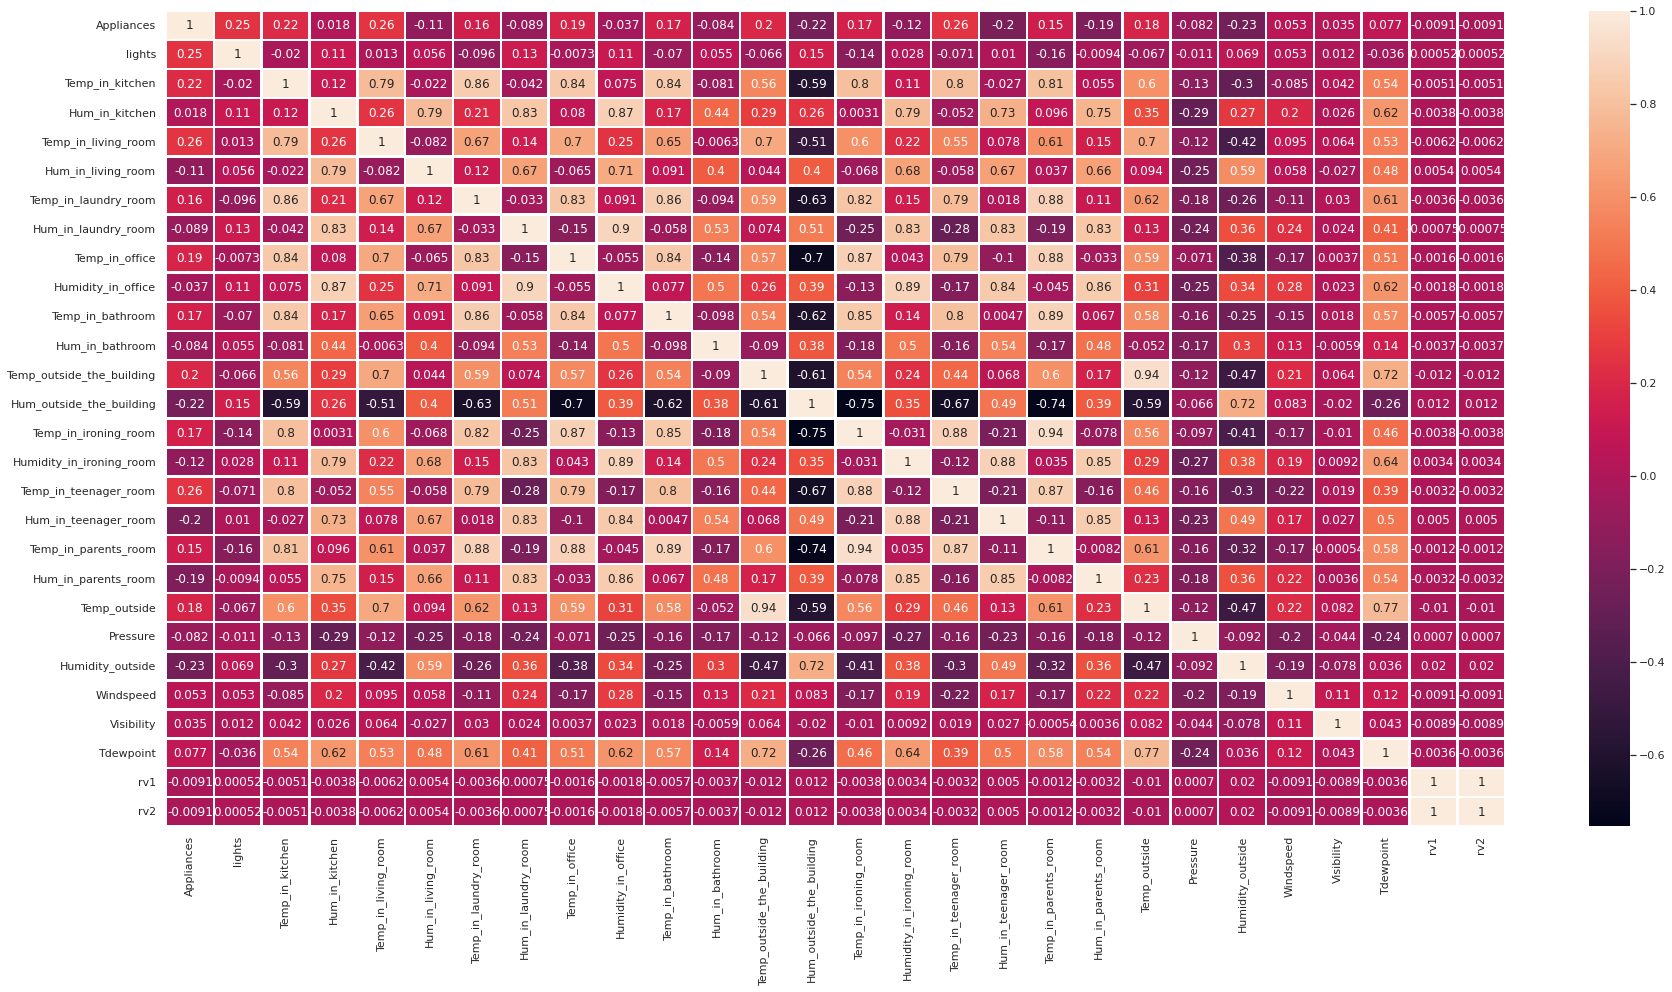

In [18]:
#Heat map to calculate the Correlation

plt.figure(figsize = (30, 15))
sns.set(font_scale = 1)
sns.heatmap(df.corr(),annot = True, linewidths = 1.5,cmap = None )
plt.show()

In [19]:
# Dealing with variables having multicollinearity
df['Temperature'] = (df['Temp_in_kitchen']+df['Temp_in_living_room']+df['Temp_in_laundry_room']+df['Temp_in_office']+df['Temp_in_bathroom']+df['Temp_outside_the_building']+df['Temp_in_ironing_room']+df['Temp_in_teenager_room']+df['Temp_in_parents_room']+df['Temp_outside'])/10

In [20]:
df.columns

Index(['Date', 'Appliances', 'lights', 'Temp_in_kitchen', 'Hum_in_kitchen',
       'Temp_in_living_room', 'Hum_in_living_room', 'Temp_in_laundry_room',
       'Hum_in_laundry_room', 'Temp_in_office', 'Humidity_in_office',
       'Temp_in_bathroom', 'Hum_in_bathroom', 'Temp_outside_the_building',
       'Hum_outside_the_building', 'Temp_in_ironing_room',
       'Humidity_in_ironing_room', 'Temp_in_teenager_room',
       'Hum_in_teenager_room', 'Temp_in_parents_room', 'Hum_in_parents_room',
       'Temp_outside', 'Pressure', 'Humidity_outside', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'Temperature'],
      dtype='object')

In [21]:
df['Humidity'] = (df['Hum_in_kitchen']+df['Hum_in_living_room']+df['Hum_in_laundry_room']+df['Humidity_in_office']+df['Hum_in_bathroom']+df['Hum_outside_the_building']+df['Humidity_in_ironing_room']+df['Hum_in_teenager_room']+df['Hum_in_parents_room']+df['Humidity_outside'])/10

In [22]:
df.drop(['Date','lights', 'Temp_in_kitchen', 'Hum_in_kitchen',
       'Temp_in_living_room', 'Hum_in_living_room', 'Temp_in_laundry_room',
       'Hum_in_laundry_room', 'Temp_in_office', 'Humidity_in_office',
       'Temp_in_bathroom', 'Hum_in_bathroom', 'Temp_outside_the_building',
       'Hum_outside_the_building', 'Temp_in_ironing_room',
       'Humidity_in_ironing_room', 'Temp_in_teenager_room',
       'Hum_in_teenager_room', 'Temp_in_parents_room', 'Hum_in_parents_room',
       'Temp_outside','Humidity_outside',
       ],axis = 1, inplace = True)

In [23]:
df.head()

,Appliances,Pressure,Windspeed,Visibility,Tdewpoint,rv1,rv2,Temperature,Humidity
0,60.0,733.5,7.000000,40.000000,5.3,13.275433,13.275433,16.110667,55.019667
1,60.0,733.6,6.666667,40.000000,5.2,18.606195,18.606195,16.083000,54.944500
2,50.0,733.7,6.333333,55.333333,5.1,28.642668,28.642668,16.030000,54.766000
3,50.0,733.8,6.000000,51.500000,5.0,45.410389,45.410389,15.985333,54.717333
4,60.0,733.9,5.666667,47.666667,4.9,10.084097,10.084097,15.977000,54.859667


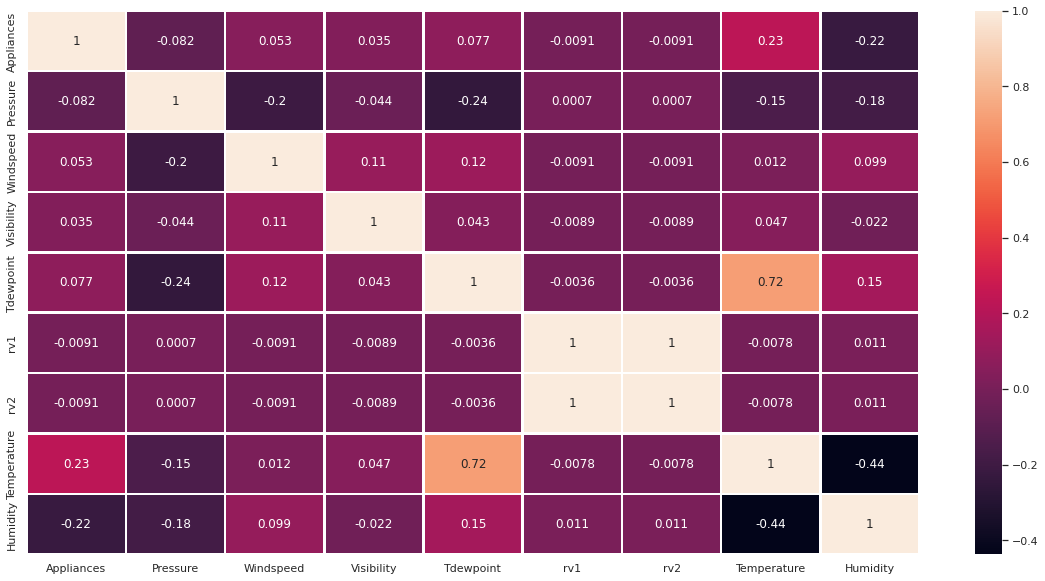

In [24]:
#Heat map to calculate the Correlation

plt.figure(figsize = (20, 10))
sns.set(font_scale = 1)
sns.heatmap(df.corr(),annot = True, linewidths = 1.5,cmap = None )
plt.show()

In [25]:
#Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [26]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Appliances','rv1','rv2']]])

,variables,VIF
0,Pressure,702.178461
1,Windspeed,4.038634
2,Visibility,20.535342
3,Tdewpoint,7.876348
4,Temperature,341.096847
5,Humidity,127.261212


In [27]:
# VIF for variables Pressure, Temperature, Humidity are high so these variables are removed.

In [28]:
df.columns

Index(['Appliances', 'Pressure', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2', 'Temperature', 'Humidity'],
      dtype='object')

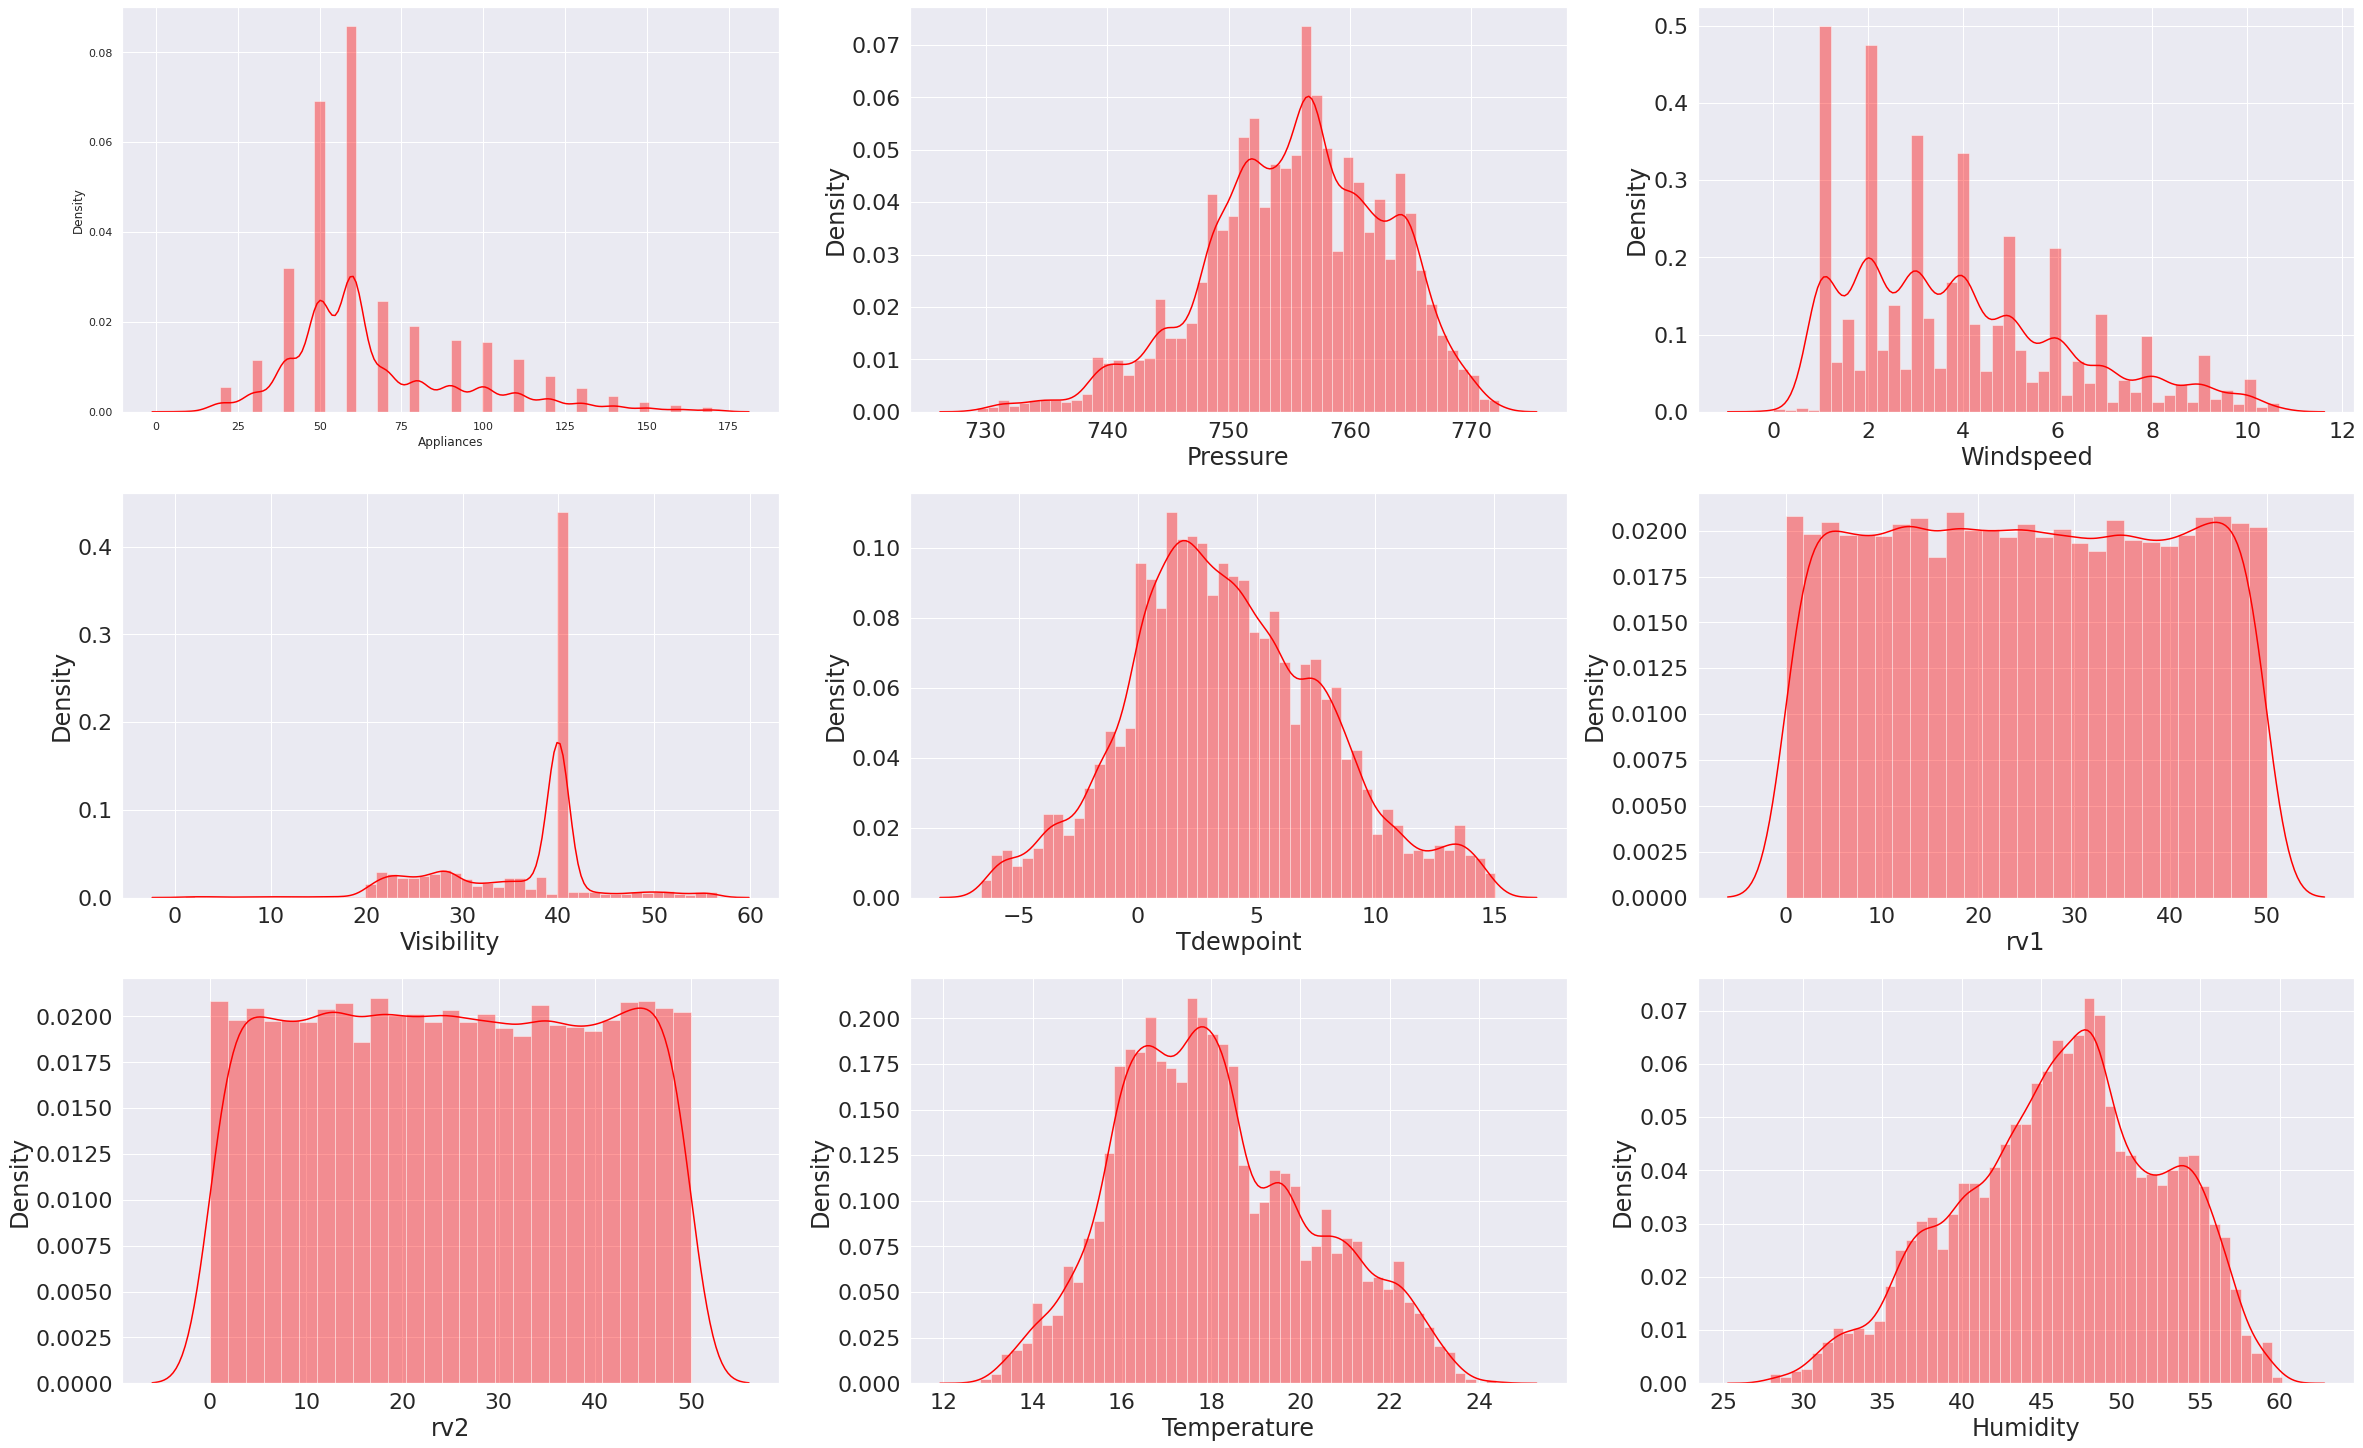

In [29]:
# Distribution plot after dealing with some highly colinear variables

lst_dist = ['Appliances', 'Pressure', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2', 'Temperature', 'Humidity']
plt.figure(figsize = (40,70))
sns.set_theme()
for i in enumerate(lst_dist):
    plt.subplot(8, 3,i[0]+1)
    sns.set(font_scale = 2)
    sns.distplot(df[i[1]],color = 'Red')

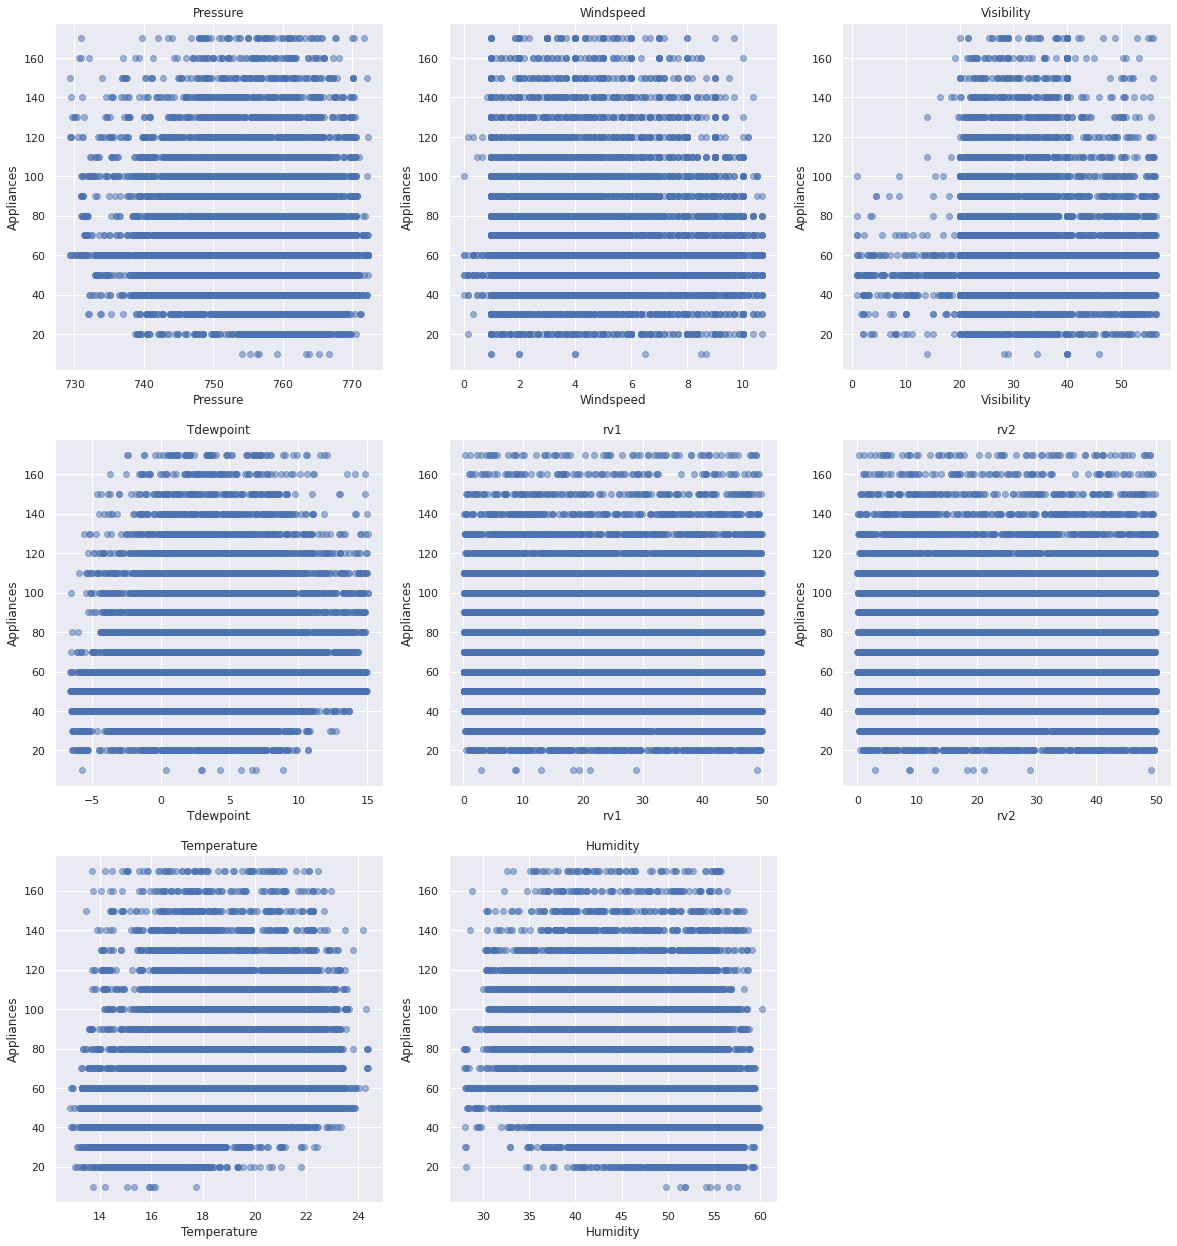

In [30]:
# Scatter plot after dealing with some highly colinear variables
lst_scatter = ['Pressure', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2', 'Temperature', 'Humidity']
plt.figure(figsize = (20,60))
sns.set_theme()
for i in enumerate(lst_scatter):
    plt.subplot(8, 3,i[0]+1)
    plt.scatter(df[i[1]], df['Appliances'], alpha=0.5)
    plt.title(i[1])
    plt.xlabel(i[1])
    plt.ylabel('Appliances')

In [31]:
# Linear Regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [32]:
# Independent variables 
# independent_variables = ['Windspeed', 'Visibility', 'Tdewpoint']
independent_variables = ['Pressure', 'Windspeed', 'Visibility', 'Tdewpoint', 'Temperature', 'Humidity']
# Dependent variables
dependent_variables = ['Appliances']

In [33]:
X = df[independent_variables].values
y = df[dependent_variables].values

In [34]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [35]:
# Transforming data

# Normailzation
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

# Z score
# from scipy.stats import zscore
# X = df[independent_variables].apply(zscore)
# y = np.log10(df['Appliances'])

In [36]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [37]:
print(regressor.intercept_)
print(regressor.coef_)

[71.79529415]
[[-13.97456401   7.17428528   3.02188511 -13.03591809  32.35749771
  -17.17353994]]


In [38]:
# y train preds
y_pred_train = regressor.predict(X_train)
y_pred_train

array([[64.24891181],
       [59.70494226],
       [60.54939338],
       ...,
       [63.47444288],
       [72.46572434],
       [59.50045289]])

In [39]:
# Predicting the Test set results
y_pred_test = regressor.predict(X_test)
y_pred_test

array([[80.42492936],
       [70.09978841],
       [71.40566422],
       ...,
       [61.89852492],
       [66.65996598],
       [69.0359142 ]])

In [40]:
print('Mean Squared Error:',mean_squared_error(y_test, y_pred_test))
print('R2 score train:',r2_score(y_train, y_pred_train)*100)
print('R2 score test:',r2_score(y_test, y_pred_test)*100)
# From Linear regression model the accuracy is low. so lets go with Regularized Linear regression

Mean Squared Error: 662.4927670836445
R2 score train: 8.294464889043729
R2 score test: 7.690648469288064


In [41]:
# Regularized Linear regression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV

In [42]:
# Lasso Regression
lasso  = Lasso(alpha=0.0004 , max_iter= 3000)
lasso.fit(X_train, y_train)
y_train_lasso_pred = lasso.predict(X_train)
print(r2_score(y_train, y_train_lasso_pred) * 100)
y_test_lasso_pred = lasso.predict(X_test)
print(r2_score(y_test, y_test_lasso_pred) * 100)

8.29445614654497
7.691727802283987


In [43]:
# Cross validation and Hyperparameter tunning for Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [0.0004,0.0005,0.0009]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0004, 0.0005, 0.0009]},
             scoring='neg_mean_squared_error')

In [44]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0004}

Using  {'alpha': 0.0004}  the negative mean squared error is:  -670.8912075175824


In [45]:
y_train_lasso_cv_pred = lasso_regressor.predict(X_train)
y_test_lasso_cv_pred = lasso_regressor.predict(X_test)

In [46]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print(r2_score(y_train_lasso_cv_pred,y_train))
print(r2_score(y_test_lasso_cv_pred,y_test))

# print("R2 :" ,r2)
# print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

-10.068935747257937
-9.730712608823946


In [47]:
# Ridge Regression
ridge  = Ridge(alpha=2 , max_iter= 3000)
ridge.fit(X_train, y_train)
y_train_ridge_pred = ridge.predict(X_train)
print(r2_score(y_train, y_train_ridge_pred) * 100)
y_test_ridge_pred = ridge.predict(X_test)
print(r2_score(y_test, y_test_ridge_pred) * 100)

8.294074136073814
7.69628501612668


In [48]:
# Cross validation and Hyperparameter tunning for Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameters = {'alpha': [1,2,3,4,5]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [1, 2, 3, 4, 5]},
             scoring='neg_mean_squared_error')

In [49]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 2}

Using  {'alpha': 2}  the negative mean squared error is:  -670.8867611497628


In [50]:
y_train_ridge_cv_pred = ridge_regressor.predict(X_train)
y_test_ridge_cv_pred = ridge_regressor.predict(X_test)

In [51]:
print(r2_score(y_train_ridge_cv_pred,y_train))
print(r2_score(y_test_ridge_cv_pred,y_test))

-10.13694965831728
-9.79581175802547


In [52]:
# From regression model we couldn't get the desired R2_score


In [57]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score,auc

In [80]:
# As Decision tree is robust to outliers and multicollinearity
df.columns

Index(['Date', 'Appliances', 'lights', 'Temp_in_kitchen', 'Hum_in_kitchen',
       'Temp_in_living_room', 'Hum_in_living_room', 'Temp_in_laundry_room',
       'Hum_in_laundry_room', 'Temp_in_office', 'Humidity_in_office',
       'Temp_in_bathroom', 'Hum_in_bathroom', 'Temp_outside_the_building',
       'Hum_outside_the_building', 'Temp_in_ironing_room',
       'Humidity_in_ironing_room', 'Temp_in_teenager_room',
       'Hum_in_teenager_room', 'Temp_in_parents_room', 'Hum_in_parents_room',
       'Temp_outside', 'Pressure', 'Humidity_outside', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [68]:
independent_variables_dt = ['Temp_in_kitchen','Hum_in_kitchen','Temp_in_living_room','Hum_in_living_room','Temp_in_laundry_room',
       'Hum_in_laundry_room','Temp_in_office','Humidity_in_office','Temp_in_bathroom','Hum_in_bathroom','Temp_outside_the_building',
       'Hum_outside_the_building', 'Temp_in_ironing_room','Humidity_in_ironing_room','Temp_in_teenager_room',
       'Hum_in_teenager_room','Temp_in_parents_room','Hum_in_parents_room',
       'Temp_outside','Pressure','Humidity_outside','Windspeed',
       'Visibility', 'Tdewpoint'] 
dependent_variables_dt = ['Appliances']
X_dt = df[independent_variables_dt].values
y_dt = df[dependent_variables_dt].values

In [79]:
# Train Test Split
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size = 3, random_state = 0)

In [106]:
# Normailzation
scaler = MinMaxScaler()
X_train_dt = scaler.fit_transform(X_train_dt)
X_test_dt = scaler.transform(X_test_dt)

In [107]:
decision_tree_reg = DecisionTreeRegressor(criterion = 'squared_error',splitter = 'best')
decision_tree_reg.fit(X_train_dt,y_train_dt)

DecisionTreeRegressor()

In [98]:
y_train_pred_dec_reg = decision_tree_reg.predict(X_train_dt)
y_test_pred_dec_reg = decision_tree_reg.predict(X_test_dt)

In [99]:
print('accuracy_score Train:',r2_score(y_train_dt,y_train_pred_dec_reg)*100)
print('accuracy_score Test:',r2_score(y_test_dt,y_test_pred_dec_reg)*100)

accuracy_score Train: 100.0
accuracy_score Test: 89.18128654970761


In [74]:
# Overfitting occcured so Ensenble will be used.

In [113]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfr  = RandomForestRegressor()
rfr.fit(X_train_dt,y_train_dt)
y_train_rfr_pred = rfr.predict(X_train_dt)
y_test_rfr_pred = rfr.predict(X_test_dt)
print('r2_score Train:',r2_score(y_train_dt,y_train_rfr_pred))
print('r2_score Test:',r2_score(y_test_dt,y_test_rfr_pred))

r2_score Train: 0.9474823997926677
r2_score Test: 0.8438397660818714


In [114]:
# Cross validation and Hyperparameter tunning for Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfr  = RandomForestRegressor()
grid_values = {'n_estimators' : [10,50,100,150],'max_depth': [5,10,15,20]}
rfr = GridSearchCV(rfr,param_grid = grid_values ,cv = 5)
rfr.fit(X_train_dt,y_train_dt)
y_train_rfr_cv_pred = rfr.predict(X_train_dt)
y_test_rfr_cv_pred = rfr.predict(X_test_dt)
print('r2_score Train:',r2_score(y_train_dt,y_train_rfr_cv_pred))
print('r2_score Test:',r2_score(y_test_dt,y_test_rfr_cv_pred))

r2_score Train: 0.917969267038784
r2_score Test: 0.8211823030344197
